# Demo Setup

In [1]:
import os
import json

import matplotlib.pyplot as plt
from funman_demo.parameter_space_plotter import ParameterSpacePlotter
from IPython.display import JSON
from funman.server.query import FunmanResults
import pydantic
from funman.model.petrinet import Model as GeneratedPetriNetModel
from funman.api.api import _wrap_with_internal_model

RESULTS_DIR = os.path.join(
    os.path.dirname(os.path.abspath("")), "scratch/out/hackathon"
)

out_dir = os.path.join(os.path.dirname(os.path.abspath("")), "out")



if not os.path.exists(out_dir):
    os.mkdir(out_dir)

def get_job_results(job):
    results_file = os.path.join(RESULTS_DIR, f"{job}.json")
    results: FunmanResults = FunmanResults.parse_file(results_file)
    return results

def plot(results):
    ParameterSpacePlotter(
        results.parameter_space, plot_points=True
    ).plot(show=False)
    plt.savefig(f"{out_dir}/{results.id}.png")
    plt.show()
    plt.close()

%load_ext autoreload
%autoreload 2

In [2]:
jobs = [
   "d1b4cb93-cf5e-48ce-8c20-99056dfbd1a4" # 1.1.b, t_0 = 0
        ]


In [3]:
job=jobs[0]
results = get_job_results(job)
#plot(results)
# JSON(results.parameter_space.dict())
results.parameter_space.true_points[0]
# df = results.dataframe(results.parameter_space.true_points[0])

{'type': 'point', 'label': 'true', 'values': {'S_0': 5599999.0, 'I_0': 0.0, 'E_0': 1.0, 'R_0': 0.0, 'D_0': 0.0, 'timer_t_4': 4.0, 'S_4': 5599999.0, 'I_4': 0.8, 'E_4': 0.19999999999999996, 'R_4': 0.0, 'D_4': 0.0, 'timer_t_0': 0.0, 't_0': 0.0, 'N': 5600000.0, 'beta_c': 0.4, 'beta_s': 1.0, 'k': 5.0, 'kappa': 0.45454545454545453, 'delta': 0.2, 'alpha': 6.4e-05, 'gamma': 0.09090909090909091, 'rho': 0.1111111111111111, 'num_steps': 1.0, 'step_size': 4.0}}

<Axes: xlabel='time'>

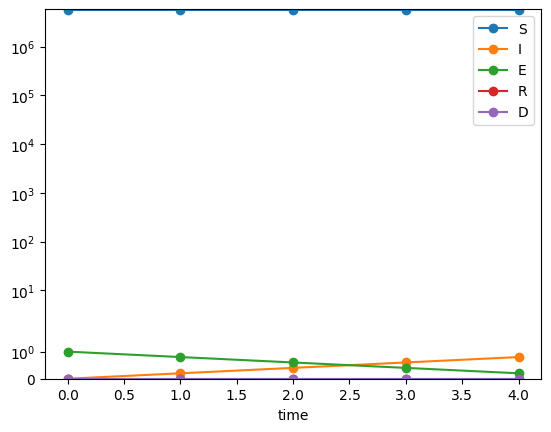

In [29]:
# from funman.server.query import FunmanWorkUnit
# # from funman.api.api import _wrap_with_internal_model
# wu = FunmanWorkUnit(id=job, model=pydantic.parse_obj_as(GeneratedPetriNetModel, results.model), request=results.request)
# scenario = wu.to_scenario()
point = results.parameter_space.true_points[0]
results.plot(point, log_y=True)